In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score

# #############################################################################
# Get sample data
iris = datasets.load_iris()
numFeatures = 4
X = iris.data[:, :numFeatures]
mat = []
for i in range(0, len(X)):
    mat.append(X[i])
mat = np.matrix(mat, dtype = float)

# #############################################################################
# Print to file to run in Urerf

with open('outTestMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')           
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")



Feature matrix of shape (150, 4) outputted. Run Urerf in R now.


In [6]:
### matrices to hold the best data outputs for changing urerf parameters ###
### format of matrics is [changingParameter, clusters, ari] ####
### Note standard parameters for each value are as follows:
        # num trees = 500
        # k = 120
        # depth = 4
        # damping = .9
        # preference = .05
k_varying = [10,15,20,30,60,90,120]
depth_varying = [4,6,8,10,12,15,20]
dataAffProp_kvalue = []
dataAffProp_depth = []
dataDBSCAN_kvalue = []
dataDBSCAN_depth = []
dataAggClust_kvalue = []
dataAggClust_depth = []
dataDP_kvalue = []
dataDP_depth = []

In [7]:
##### Clustering ######
def AffinityPropagationClustering(inputMat, dampInit = .4, dampInc = .1, preferenceInit = 0, preferenceInc = .05):
    maxDamp = 0
    maxPre = 0
    maxARI = -float("inf")
    maxClust = 0
    pre = preferenceInit
    while pre < 1:
        #vary the preference value
        pre = pre + preferenceInc
        damp = dampInit
        while damp + dampInc <= .95:
            #vary the damping value
            damp = damp + dampInc
            af = AffinityPropagation(damping = damp, preference = pre, affinity="precomputed").fit(inputMat)
            cluster_centers_indices = af.cluster_centers_indices_
            labels = af.labels_
            n_clusters = len(cluster_centers_indices)

            if n_clusters <= len(inputMat) - 1:
                ari = adjusted_rand_score(iris.target, labels)
                print('|Preference |% 1.2f' % pre, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| ARI | % 1.3f" % ari, "|")
                if (ari > maxARI):
                    maxDamp = damp
                    maxPre = pre
                    maxARI = ari
                    maxClust = n_clusters
                    ss = silhouette_score(inputMat, labels)


    print("Best Damping Value:", maxDamp, "Best Preference Value:", maxPre)
    return maxDamp, maxPre, maxARI, maxClust

def AgglomerativeClustering_(inputMat, clustInit = 2, clustInc = 1):
    maxClusters = 0
    maxARI = -1
    clust = clustInit
    while clust < (len(inputMat)/4):
        #vary the cluster number
        clust = clust + clustInc
        ag = AgglomerativeClustering(n_clusters=clust, affinity="precomputed", linkage = 'average').fit(inputMat)
        labels = ag.labels_
        n_clusters = clust

        if n_clusters <= len(inputMat) - 1:
            ari = adjusted_rand_score(iris.target, labels)
            print("| Clusters | % 1.1f" % clust, "| ARI | % 1.3f" % ari, "|")
            if (ari > maxARI):
                maxClusters = clust
                maxARI = ari
                ss = silhouette_score(inputMat, labels)

    print("Best Cluster Value:", maxClust)
    return maxARI, maxClusters

def DBSCANClustering(inputMat):
    db = DBSCAN(metric="precomputed").fit(inputMat)
    labels = db.labels_
    n_clusters = len(set(labels))
    print(labels)
    if n_clusters <= len(inputMat):
        ari = adjusted_rand_score(iris.target, labels)
        print("| Clusters | ", n_clusters, "| ARI | % 1.3f" % ari, "|")
    return ari, n_clusters



In [8]:
###### Plotting ######
def graph2DLabels(mat, labels):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)
    plt.title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
def graph3DLabels(mat, labels):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.set_title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

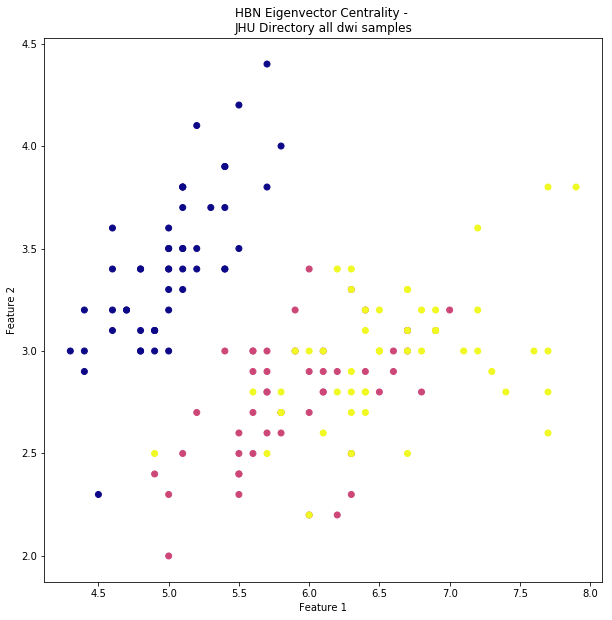

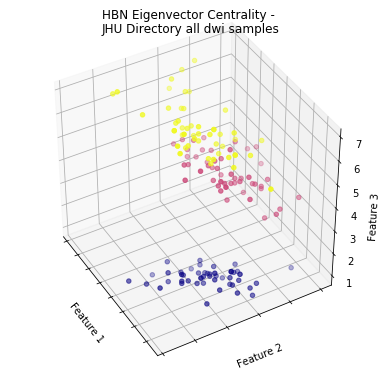

In [9]:
plt.figure(1)
graph2DLabels(mat, iris.target)
plt.figure(2)
graph3DLabels(mat, iris.target)

In [23]:
## Load similarity matrix from Urerf
matrix = open('inTestMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)
print(inputMat.shape)
#set i to the trial number
i = 6

print("AFFINITY PROPAGATION")
maxDamp, maxPre, maxAri, maxClust = AffinityPropagationClustering(inputMat,.8,.1, 0, .05)
dataAffProp_kvalue.append([k_varying[i], maxClust, maxAri])
print("DBSCAN")
maxAri, maxClust = DBSCANClustering(inputMat)
dataDBSCAN_kvalue.append([k_varying[i], maxClust, maxAri])
print("AGGLOMERATIVE CLUSTERING")
maxAri, maxClust = AgglomerativeClustering_(inputMat)
dataAggClust_kvalue.append([k_varying[i], maxClust, maxAri])

print(dataAffProp_kvalue)
print(dataDBSCAN_kvalue)
print(dataAggClust_kvalue)

(150, 150)
AFFINITY PROPAGATION
|Preference | 0.05 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.10 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.15 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.20 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.25 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.30 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.35 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.40 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.45 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.50 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.55 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.60 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.65 | Damping |  0.9 | Clusters |  3 | ARI |  0.515 |
|Preference | 0.70 | Damping |  0.9 | Clusters |  5 | ARI |  0.532 |
|P

[[  4.           5.           0.54148138]
 [  6.           6.           0.41988455]
 [  8.           4.           0.64167008]
 [ 10.           3.           0.64804442]
 [ 12.           4.           0.55963813]
 [ 15.           3.           0.55867377]
 [ 20.           5.           0.55809087]]
[[  4.00000000e+00   2.00000000e+00   1.06383961e-01]
 [  6.00000000e+00   3.00000000e+00   1.32518866e-02]
 [  8.00000000e+00   3.00000000e+00   2.42597973e-02]
 [  1.00000000e+01   3.00000000e+00   3.41622995e-02]
 [  1.20000000e+01   3.00000000e+00   1.32518866e-02]
 [  1.50000000e+01   3.00000000e+00   3.41622995e-02]
 [  2.00000000e+01   3.00000000e+00   6.02669059e-03]]
[[  4.00000000e+00   4.00000000e+00   2.22198151e-03]
 [  6.00000000e+00   6.00000000e+00   2.63381958e-03]
 [  8.00000000e+00   4.00000000e+00   2.22198151e-03]
 [  1.00000000e+01   5.00000000e+00   2.54708685e-03]
 [  1.20000000e+01   1.00000000e+01   1.66776303e-03]
 [  1.50000000e+01   1.40000000e+01   2.78986068e-03]
 [

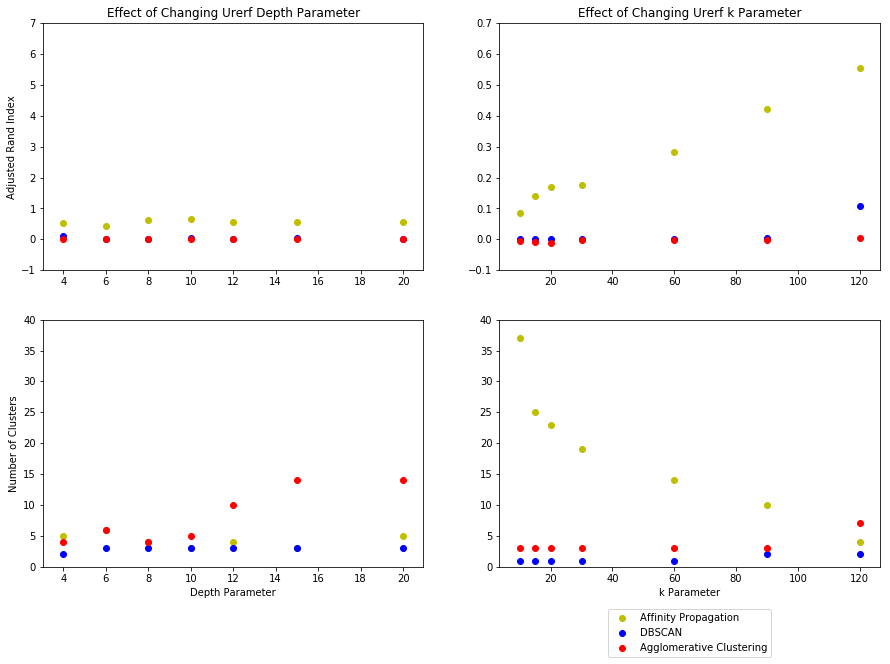

In [29]:
dataAffProp_depth = np.matrix(dataAffProp_depth)
dataDBSCAN_depth = np.matrix(dataDBSCAN_depth)
dataAggClust_depth = np.matrix(dataAggClust_depth)
dataAffProp_kvalue = np.matrix(dataAffProp_kvalue)
dataDBSCAN_kvalue = np.matrix(dataDBSCAN_kvalue)
dataAggClust_kvalue = np.matrix(dataAggClust_kvalue)
print(dataAffProp_depth)
print(dataDBSCAN_depth)
print(dataAggClust_depth)
print(dataAffProp_kvalue)
print(dataDBSCAN_kvalue)
print(dataAggClust_kvalue)
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter([depth_varying], dataAffProp_depth[:,2].tolist(), c = 'y', label='Affinity Propagation')
plt.scatter(depth_varying, dataDBSCAN_depth[:,2].tolist(), c = 'b', label='DBSCAN')
plt.scatter(depth_varying, dataAggClust_depth[:,2].tolist(), c = 'r', label='Agglomerative Clustering')
plt.title("Effect of Changing Urerf Depth Parameter")
plt.ylabel('Adjusted Rand Index')
ax = plt.gca()
ax.set_ylim(-1.0,7.0)
plt.subplot(2,2,2)
plt.scatter(k_varying, dataAffProp_kvalue[:,2].tolist(), c = 'y', label='Affinity Propagation')
plt.scatter(k_varying, dataDBSCAN_kvalue[:,2].tolist(), c = 'b', label='DBSCAN')
plt.scatter(k_varying, dataAggClust_kvalue[:,2].tolist(), c = 'r', label='Agglomerative Clustering')
ax = plt.gca()
ax.set_ylim(-0.1,0.7)
plt.title("Effect of Changing Urerf k Parameter")
plt.subplot(2,2,3)
plt.scatter(depth_varying, dataAffProp_depth[:,1].tolist(), c = 'y', label='Affinity Propagation')
plt.scatter(depth_varying, dataDBSCAN_depth[:,1].tolist(), c = 'b', label='DBSCAN')
plt.scatter(depth_varying, dataAggClust_depth[:,1].tolist(), c = 'r', label='Agglomerative Clustering')
plt.xlabel('Depth Parameter')
plt.ylabel('Number of Clusters')
ax = plt.gca()
ax.set_ylim(0.0,40.0)
plt.subplot(2,2,4)
plt.scatter(k_varying, dataAffProp_kvalue[:,1].tolist(), c = 'y', label='Affinity Propagation')
plt.scatter(k_varying, dataDBSCAN_kvalue[:,1].tolist(), c = 'b', label='DBSCAN')
plt.scatter(k_varying, dataAggClust_kvalue[:,1].tolist(), c = 'r', label='Agglomerative Clustering')
plt.xlabel('k Parameter')
ax = plt.gca()
ax.set_ylim(0.0,40.0)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))



In [11]:
# cluster using the best affinity propagation output
af = AffinityPropagation(damping = maxDamp, preference = maxPre,affinity="precomputed").fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels_best_af = af.labels_
n_clusters_af = len(cluster_centers_indices)


## Sort similarity matrix based on clusters
#create a dictionary of labels and flowers
nodeDict = dict(enumerate(labels_best_af))
#sort the flowers so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

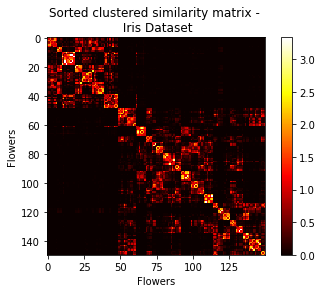

In [12]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()

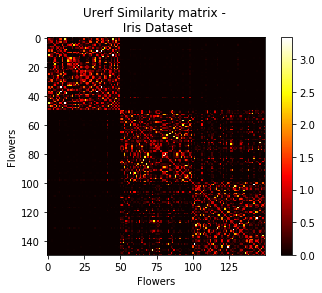

In [13]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Urerf Similarity matrix - \n Iris Dataset")
plt.show()

AFFINITY PROPAGATION
Number of Clusters =  29
Accuracy 0.0466666666667


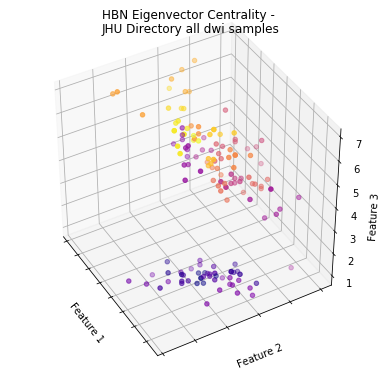

In [23]:
###### Create a plot of the clusters color-coded as such ######
from sklearn.metrics import accuracy_score
print('AFFINITY PROPAGATION')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_af)
if (numFeatures ==3):
    graph3DLabels(mat,labels_best_af)
print("Number of Clusters = ", n_clusters_af)
print("Accuracy", accuracy_score(labels_best_af, iris.target))

MINI BATCH K MEANS
Number of Clusters =  10
Accuracy 0.0933333333333


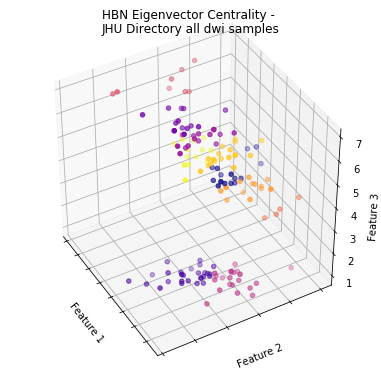

In [24]:
###### Create a plot of the clusters color-coded as such ######
print('MINI BATCH K MEANS')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_mb)

if (numFeatures ==3):
    graph3DLabels(mat,labels_best_mb)
print("Number of Clusters = ", n_clusters_mb)
print("Accuracy", accuracy_score(labels_best_mb, iris.target))

In [25]:
##### Compare the two Algorithms #####
print("Accuracy", accuracy_score(labels_best_mb, labels_best_af))
print(labels_best_af)
print(labels_best_mb)

Accuracy 0.0533333333333
[ 0  2  7  7  0  1  7  4  2  2  5  4  2  7  6  6  6  0  1  3  5  3  7  4  4
  2  4  0  0  7  2  5  3  6  2  7  5  2  7  4  0 10  7  4  1  2  3  7  3  0
  8  9  8 17 11 12  9 10 11 10 10 18 14 16 18  8 12 13 14 17  9 19 15 16 19
 11 11 28 19 17 17 17 13 20 12  9  8 14 18 17 17 24 13 10 13 18 18 19 10 13
 27 20 26 25 21 23 10 23 15 22  9 25 21 20 20  9 21 22 23 14 27 20 23 15 27
 26 16 24 25 26 23 22 25 16 25 26 27 21 24  8 27  8 20 27 27 28 15 28 27 24]
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 4 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 1 4 4 1 1 4 1 4 1 4 9 9 9 7 9 0 9 6 9 7 6 0 0 8 7 9 0 0 0 7 8 0 8 8
 9 9 9 9 0 7 7 7 0 8 7 9 9 0 7 7 7 8 0 6 7 0 0 0 6 0 2 8 2 3 2 5 7 5 2 2 3
 3 2 8 8 3 3 5 5 8 2 8 5 8 2 2 8 8 3 2 5 5 3 3 3 5 3 3 8 2 2 3 8 2 2 3 8 3
 3 8]


Text(0,0.5,'Number of Clusters')

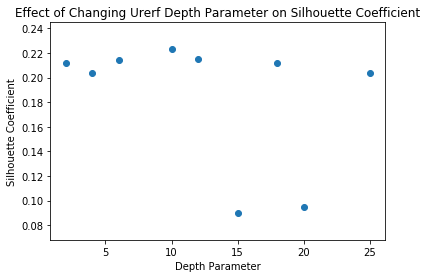

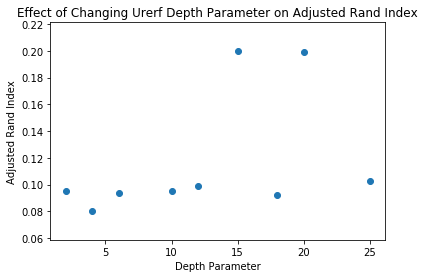

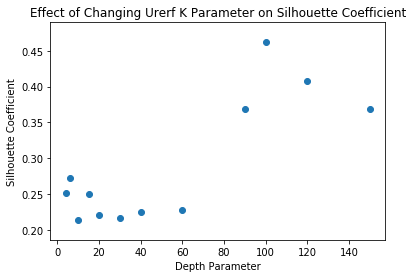

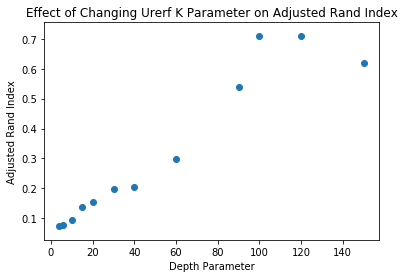

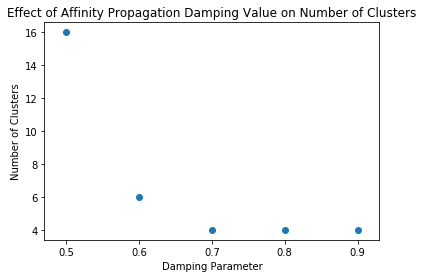

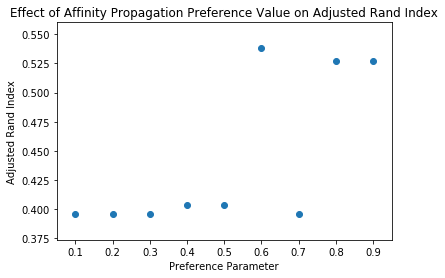

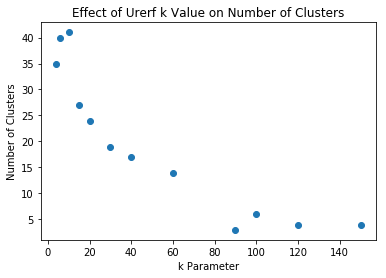

In [169]:
###### Plotting Collected Data ########


plt.figure()
depthValues = [4,10,2,12,6,15,25,20,18]
ssDepthValues = [0.204,0.223,0.212,0.215,0.214,.090,.204,.095,.212]
ariDepthValues = [0.08,0.095,0.095,0.099,0.094,.200,.103,.199,.092]
plt.scatter(depthValues, ssDepthValues)
plt.title("Effect of Changing Urerf Depth Parameter on Silhouette Coefficient")
plt.xlabel('Depth Parameter')
plt.ylabel('Silhouette Coefficient')
plt.figure()
plt.scatter(depthValues, ariDepthValues)
plt.title("Effect of Changing Urerf Depth Parameter on Adjusted Rand Index")
plt.xlabel('Depth Parameter')
plt.ylabel('Adjusted Rand Index')
plt.figure()
kValues = [10,6,4,15,20,30,40,60,100,120, 150, 90]
sskValues = [0.214,0.272,0.252,0.25, .221,.217,.225, .228,.462,.408, .369, .369]
ariKValues = [0.094,0.076,0.075,0.137, .156,.198,.204, .298, .708,.708, .618, .538]
plt.scatter(kValues, sskValues)
plt.title("Effect of Changing Urerf K Parameter on Silhouette Coefficient")
plt.xlabel('Depth Parameter')
plt.ylabel('Silhouette Coefficient')
plt.figure()
plt.scatter(kValues, ariKValues)
plt.title("Effect of Changing Urerf K Parameter on Adjusted Rand Index")
plt.xlabel('Depth Parameter')
plt.ylabel('Adjusted Rand Index')

plt.figure()
dampValues = [.5,.6,.7,.8,.9]
numClusters = [16,6,4,4,4]
plt.scatter(dampValues, numClusters)
plt.title("Effect of Affinity Propagation Damping Value on Number of Clusters")
plt.xlabel('Damping Parameter')
plt.ylabel('Number of Clusters')

plt.figure()
preValues = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
numClusters = [.396,.396,.396,.404,.404,.538,.396,.527,.527]
plt.scatter(preValues, numClusters)
plt.title("Effect of Affinity Propagation Preference Value on Adjusted Rand Index")
plt.xlabel('Preference Parameter')
plt.ylabel('Adjusted Rand Index')

plt.figure()
kValues2 = [10,6,4,15,20,30,40,60,100,120, 150, 90]
numClusters = [41, 40, 35, 27, 24, 19, 17, 14, 6, 4, 4, 3]
plt.scatter(kValues2, numClusters)
plt.title("Effect of Urerf k Value on Number of Clusters")
plt.xlabel('k Parameter')
plt.ylabel('Number of Clusters')